In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize              #Optimization library
np.set_printoptions(precision=3)                 # Used for print formatting
import scipy.stats as sp
import matplotlib.pyplot as plt

In [78]:
def Generate_return_multidim(portWgtMVO, portWgtLSTM, assetRet):   # for multi-dimension inputs
    
    returnMVO = []
    returnLSTM = []
    Cumulative_retMVO = []
    Cumulative_retLSTM = []
    cumRetMVO = 1000000
    cumRetLSTM = 1000000
    
    nObs = len(portWgtMVO)
    for i in range(nObs):
        
        portRetMVO = np.dot(assetRet.iloc[i*21:i*21+21,], portWgtMVO.iloc[i,])
        monthly_mean_portRetMVO = np.mean(portRetMVO)
        returnMVO.append(monthly_mean_portRetMVO)
        portRetLSTM = np.dot(assetRet.iloc[i*21:i*21+21,], portWgtLSTM.iloc[i,])
        monthly_mean_portRetLSTM = np.mean(portRetLSTM)
        returnLSTM.append(monthly_mean_portRetLSTM)
    
        cumRetMVO += monthly_mean_portRetMVO
        Cumulative_retMVO.append(cumRetMVO)       
        cumRetLSTM += monthly_mean_portRetLSTM
        Cumulative_retLSTM.append(cumRetLSTM)

    return (returnMVO, returnLSTM, Cumulative_retMVO, Cumulative_retLSTM)


def Generate_return(portWgtMVO, portWgtLSTM, assetRet):
    
    returnMVO = []
    returnLSTM = []
    Cumulative_retMVO = []
    Cumulative_retLSTM = []
    cumRetMVO = 1000000
    cumRetLSTM = 1000000
    
    nObs = len(portWgtMVO)
    #print(portWgtMVO.shape, portWgtLSTM.shape)     # input weights should be one-dimention
    for i in range(nObs):        
        
        portRetMVO = assetRet[i]*portWgtMVO[i]      # assetRet should be monthly mean asset return
        returnMVO.append(portRetMVO)
        cumRetMVO += portRetMVO
        Cumulative_retMVO.append(cumRetMVO)
        
        portRetLSTM = assetRet[i]*portWgtLSTM[i]
        returnLSTM.append(portRetLSTM)
        cumRetLSTM += portRetLSTM
        Cumulative_retLSTM.append(cumRetLSTM)
        
    return (returnMVO, returnLSTM, Cumulative_retMVO, Cumulative_retLSTM)


def Performance_Stats(portWgtMVO, portWgtLSTM, returnMVO, returnLSTM):
    
    df = {'PortWgtMVO-1': portWgtMVO.iloc[:,0],'PortWgtMVO-2': portWgtMVO.iloc[:,1],'PortWgtMVO-3': portWgtMVO.iloc[:,2],
          'PortWgtLSTM-1': portWgtLSTM.iloc[:,0], 'PortWgtLSTM-2': portWgtLSTM.iloc[:,1], 'PortWgtLSTM-3': portWgtLSTM.iloc[:,2],
          'PortRetMVO': returnMVO, 'PortRetLSTM': returnLSTM}
    result = pd.DataFrame(data = df)
    print('Performance Results')
    print('-------------------')
    print(result.describe())

    
def Plot_PortRet(returnMVO, returnLSTM):
    
    #plt.subplot(2, 1, 1)
    plt.plot(returnMVO, label="MVO")
    plt.plot(returnLSTM, label="LSTM")
    #plt.plot(assetRet, label="Asset")
    plt.title('Average Return')
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend()
    
def Plot_CumulPortRet(Cumulative_retMVO, Cumulative_retLSTM):
    
    #plt.subplot(2, 1, 2)
    plt.plot(Cumulative_retMVO, label="MVO")
    plt.plot(Cumulative_retLSTM, label="LSTM")
    plt.title('Cumulative Portfolio Return')
    plt.legend()
    plt.show()

In [105]:
# fake data
# MVOweight = [0, 0.1, 0.4, 0.5, 0.3]
# LSTMweight = [0.5, 0.3, 0.9, 0.1, 0.6]
# Assetret = [0.456, -0.9, 1.78, 0.7019, -0.216]

# read data
columns=[0,1,2]
MVOweight = pd.read_csv("test_weight_for_cmp.csv", sep=',', usecols=columns, engine='python')
LSTMweight = pd.read_csv("adj_lstm_weight.csv", sep=',', usecols=columns, engine='python')
Assetret =pd.read_csv("returns_coins.csv", sep=',', usecols=[1,2,3], engine='python')
nDelete = len(Assetret) - 21*len(LSTMweight)
Assetret = Assetret.iloc[nDelete:,:]
print(MVOweight.shape, LSTMweight.shape, Assetret.shape)
Assetret.head()


(699, 3) (699, 3) (14679, 3)


,0,1,2
237321,5.437103e-06,-0.000151,0.007355
237322,1.059609e-05,0.000031,-0.001358
237323,-1.823601e-04,0.000528,-0.005535
237324,1.188587e-04,-0.000331,0.002724
237325,-1.059000e-07,-0.000034,0.003671


In [106]:
# test functions

#### uncomment for multi-dimension inputs
returnMVO, returnLSTM, Cumulative_retMVO, Cumulative_retLSTM = Generate_return_multidim(MVOweight, LSTMweight, Assetret)

Performance_Stats(MVOweight, LSTMweight, returnMVO, returnLSTM)


Performance Results
-------------------
       PortRetLSTM    PortRetMVO  PortWgtLSTM-1  PortWgtLSTM-2  PortWgtLSTM-3  \
count   699.000000  6.990000e+02     699.000000     699.000000     699.000000   
mean      0.000003 -1.701936e-05       0.383347       0.308327       0.308327   
std       0.000360  8.418572e-04       0.014436       0.007218       0.007218   
min      -0.001255 -3.985935e-03       0.361458       0.285141       0.285141   
25%      -0.000260 -1.179056e-04       0.371443       0.303510       0.303510   
50%       0.000010 -9.596619e-07       0.381067       0.309466       0.309466   
75%       0.000249  1.271209e-04       0.392980       0.314278       0.314278   
max       0.001035  2.846709e-03       0.429718       0.319271       0.319271   

       PortWgtMVO-1  PortWgtMVO-2  PortWgtMVO-3  
count    699.000000    699.000000    699.000000  
mean       0.223090      0.234664      0.542246  
std        0.251779      0.261493      0.496920  
min        0.000000      0.000

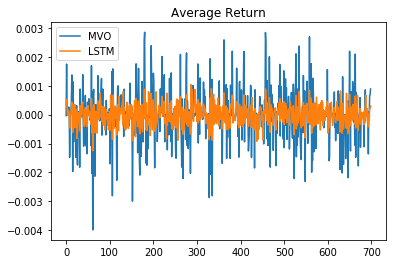

In [107]:
# plot portfolio returns of each month
Plot_PortRet(returnMVO, returnLSTM)

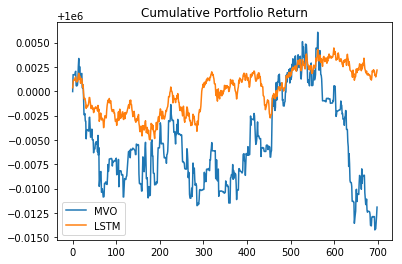

In [108]:
# plot cimulative portfolio returns
Plot_CumulPortRet(Cumulative_retMVO, Cumulative_retLSTM)